# Prediction for E-Commerce Product Delivery

This project's goal is to forecast whether or not an online retailer's merchandise will arrive on schedule. This research also examines consumer behavior and assesses a number of variables that impact product delivery.

### Data Dictionary
The dataset used for model building contains 10999 observations of 12 variables. The data contains the following information:


| Variable | Description |
| --- | --- |
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided into block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('/Users/bhavanaraju/Downloads/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing 1

In [5]:
#Checking the shape of the dataset
print(df.shape)

#Checking data types of the columns
print(df.dtypes)

(10999, 12)
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [6]:
#Dropping column ID because it is an index column
df.drop(['ID'], axis=1, inplace=True)  


In [7]:
#Checking for null/missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#Checking for duplicate values
df.duplicated().sum()

0

#### Descriptive Statistics

In [9]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis

During the exploratory data analysis, I will examine the correlation between the target variable and other variables. Additionally, I will assess the distribution of variables throughout the dataset to gain a deeper understanding of the data.

#### Customer Gender Distribution

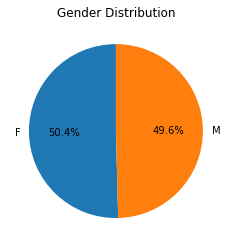

In [20]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The dataset has an equal number of male and female customers, with percentages of 49.6% and 50.4%, respectively.

#### Product Properties

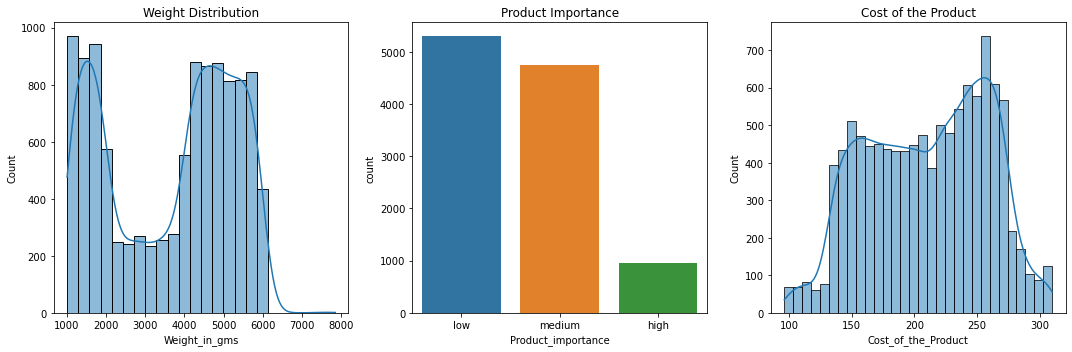

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Weight_in_gms'], kde=True, ax=axes[0]).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=axes[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], kde=True, ax=axes[2]).set_title('Cost of the Product')
plt.tight_layout()
plt.show()

These three charts depict the distribution of product attributes—Weight, Cost, and Importance—within the dataset. Initially, examining the weight distribution reveals a prevalence of products weighing between 1000-2000 grams and 4000-6000 grams, indicating higher sales in these weight categories. Moving to the second chart, it illustrates the distribution of product importance, showcasing that most products hold low to medium importance. Lastly, the third chart delves into the cost distribution, revealing increased prevalence between 150-200 and 225-275 dollars. 

Based on these findings, it can be inferred that the majority of products weigh less than 6000 grams, possess low or medium importance, and are priced between 150-275 dollars.

#### Logistics

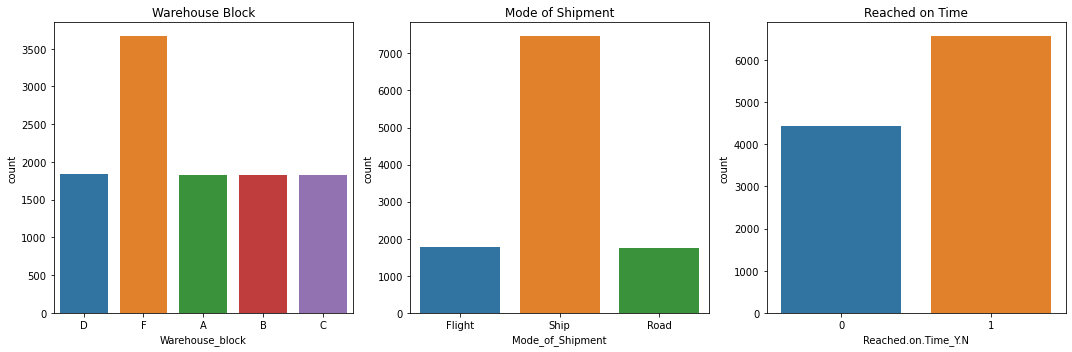

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Warehouse_block', data=df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=ax[2]).set_title('Reached on Time')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Show the plot

The graphs above depict the logistics and distribution of the product. In the initial graph, Warehouse F stands out with a product count of 3500, whereas the other warehouses show a relatively uniform distribution. The second graph illustrates shipping methods, with the majority utilizing ships, while approximately 2000 products are shipped via air and road. The third graph focuses on timely deliveries, indicating that more products are delivered punctually compared to those that are not.

According to the analysis of the graphs, it can be inferred that Warehouse F likely has proximity to a seaport, given its significant product volume and the prevalence of shipping via ships.

#### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

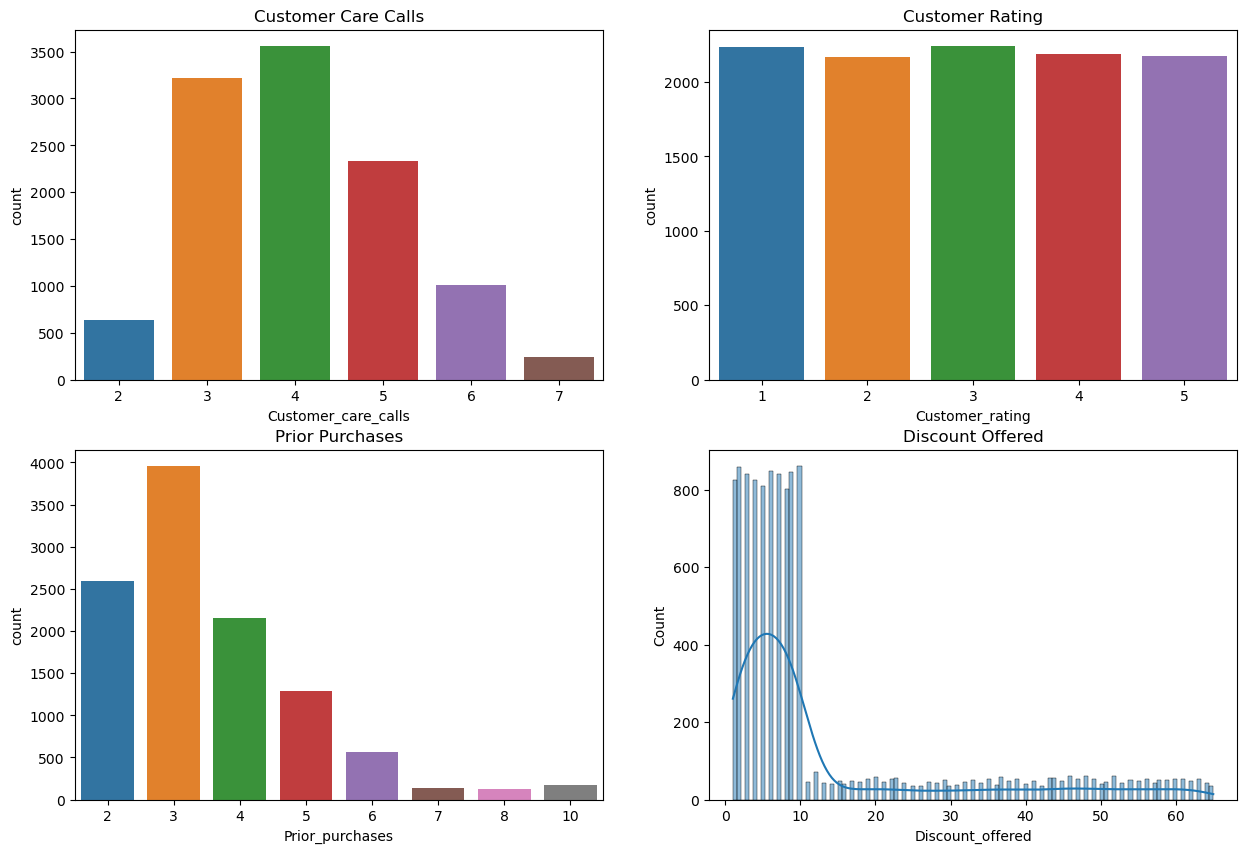

In [11]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

The preceding visualizations depict the customer experience gleaned from their interactions with customer care, ratings, prior purchases, and offered discounts. The initial graph illustrates the frequency of customer care calls, revealing that a significant portion of customers have made 3-4 calls, suggesting potential issues with product delivery. Subsequently, the second graph indicates an even distribution of customer ratings, albeit with a slight increase in the count of rating 1, indicating dissatisfaction with the service.

The third visualization focuses on customers' prior purchases, highlighting that the majority have made 2-3 purchases, suggesting satisfaction and continued patronage. Finally, the fourth graph showcases the distribution of discounts offered on products, with the majority falling within the 0-10% range, indicating conservative discounting practices by the company.

## Data Preprocessing 2

In [12]:
## Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


## Correlation Matrix Heatmap

<Axes: >

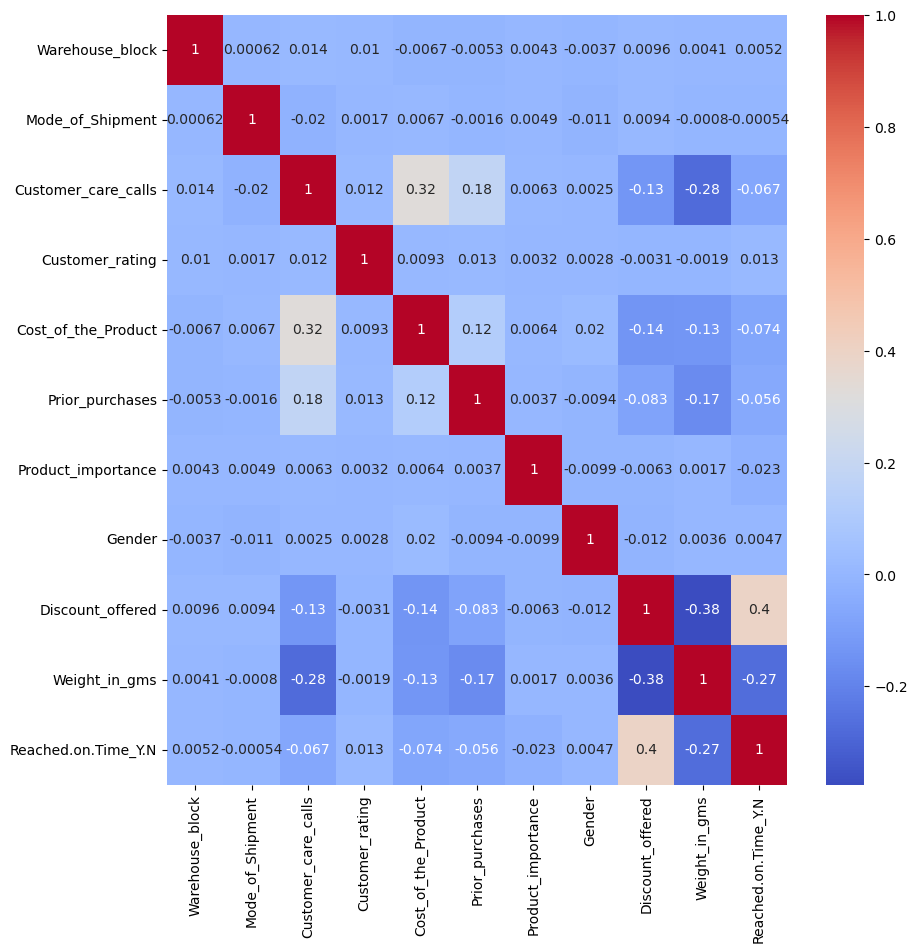

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The number of customer service calls and the cost of the product show a positive link in the correlation matrix heatmap.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

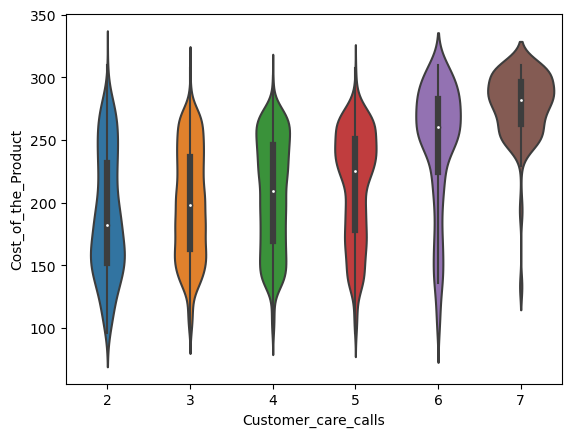

In [14]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

Customers are clearly more concerned with product delivery when the product is expensive. This is why they called customer service to find out the status of the product. As a result, when the product is expensive, it is critical to ensure its timely delivery.

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Model Building

We will be using the following models to predict the product delivery:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- K Nearest Neighbors

#### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

- **RandomForestClassifier** is an ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset.
- Import the **RandomForestClassifier** class from scikit-learn's ensemble module. 

In [50]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=8, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=2, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=6, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=6, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.1s
[CV] END criterion=entropy, max_depth=16, min_samp

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=6, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=12, min_sample

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   1.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=8, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=12, min_sampl

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=6, random_state=42; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=8, random_state=0; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=8, random_state=0; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=8, random_state=42; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=8, random_state=0; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, 

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=8, random_state=42; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=6,

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=6,

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=6, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, random_state=0; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=4, m

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


- **GridSearchCV** is used for hyperparameter tuning by searching over a specified parameter grid.
- **param_grid** containing various hyperparameter values to be tested during grid search. This includes values for 'max_depth', 'min_samples_leaf', 'min_samples_split', 'criterion', and 'random_state'.The specific values for max_depth, min_samples_leaf, and min_samples_split are chosen to prevent the model from overfitting to the training data. These hyperparameters control the complexity of the individual trees, ensuring they don't become too deep or too specific to the training set.
- **GridSearchCV Object** takes the RandomForestClassifier as the estimator, the parameter grid defined earlier, performs 5-fold cross-validation (cv=5), uses all available processors for parallel execution (n_jobs=-1), provides verbose output during the search (verbose=2), and evaluates models based on accuracy (scoring='accuracy'). The GridSearchCV will evaluate the model's performance for each combination and return the best set of hyperparameters that maximize the specified scoring metric (in this case, accuracy).

In [51]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

- **random_state** The random_state parameter ensures reproducibility. By setting a specific random seed, you make sure that the randomness introduced during the training process is consistent across different runs. This is important for result reproducibility and debugging.
- By using **rfc.fit:** Fit the RandomForestClassifier to the training data using the best hyperparameters.

In [52]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


- **rfc.score** gives the training accuracy of the trained model on the training data.

In [53]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 1, ..., 0, 1, 0])

- By using the trained RandomForestClassifier we can make the predictions(using **rfc.predict**) on the test set.

Feature Names: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
Class Names: ['1', '0']


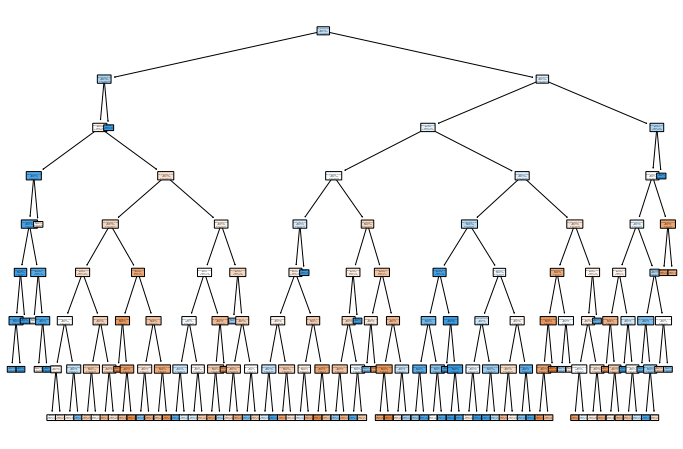

In [54]:
# Extract feature names as strings
feature_names = [str(feature) for feature in df.columns[:-1].tolist()]

# Extract class names as strings
class_names = [str(label) for label in df.iloc[:, -1].unique().tolist()]

# Print feature names and class names
print("Feature Names:", feature_names)
print("Class Names:", class_names)

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize one tree from the RandomForestClassifier
plt.figure(figsize=(12, 8))
plot_tree(rfc.estimators_[1], feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

By employing the feature_names and class_names, we can visualize a tree, and the resultant tree visualization provides valuable insights into the decision-making process of the RandomForestClassifier. This aids in comprehending the hierarchical structure of the model's rules and the importance of different features.

#### Decision Tree Classifier

Here, we demonstrate the process of initializing, tuning, training, and evaluating a Decision Tree Classifier model using scikit-learn library in Python.

In [56]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

A Decision Tree Classifier model was trained using the training dataset. Hyperparameter tuning was performed using GridSearchCV to identify the best combination of parameters for optimal model performance. The following hyperparameters were tuned:

In [57]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


GridSearchCV from sklearn.model_selection is used for hyperparameter tuning.
"param_grid" specifies the hyperparameters to be tuned along with their possible values.
After evaluating 256 different combinations of hyperparameters, the best parameters are identified.

In [58]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

A new instance of DecisionTreeClassifier is created with the best hyperparameters obtained from the grid search.

In [59]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


The model achieved an accuracy score of approximately 69.13% on the training dataset using these tuned hyperparameters.

In [60]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, rando

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, random

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=6, ran

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, rand

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, random_state=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, rando

#### Logistic Regression

Logistic regression can be employed to predict the estimated delivery time for products based on various factors.

In [16]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [17]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Training accuracy
lr.score(X_train, y_train)

0.6356404136833731

In [21]:
#predicting the test set results
lr_pred = lr.predict(X_test)
print(lr_pred)

[0 0 1 ... 0 1 1]


## Model Evaluation

Model evaluation is a crucial step in machine learning with multifaceted importance. It quantitatively measures a model's performance, assessing metrics like accuracy, precision, and recall. This evaluation guides decision-making, aiding in selecting the best model or determining if the current one meets performance standards. Diagnostic metrics such as the confusion matrix identify errors, offering insights for improvement. When dealing with multiple models, evaluation metrics enable direct comparisons for optimal model selection. Additionally, it plays a key role in hyperparameter tuning and optimization, guiding parameter adjustments. Overall, model evaluation provides actionable insights, supports decision-making, and drives continuous improvement in predictive performance.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

- This heatmap represents the confusion matrix of predictions (`rfc_pred`) made by a particular model on the test data (`y_test`). The 'coolwarm' colormap is used, and the matrix is annotated with actual counts.
- The resulting visualizations will provide a comparative view of the classification performance of four different classifiers (Random Forest, Decision Tree, Logistic Regression, and KNN) on the test data. The confusion matrices will show the true positive, true negative, false positive, and false negative values, enabling a qualitative assessment of each model's ability to correctly classify instances and identify areas of improvement or optimization.

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

### Classification report
The classification report for four different classifiers (Random Forest, Decision Tree, Logistic Regression, and KNN) applied to the test data. The classification report includes metrics such as precision, recall, F1-score, and support for each class

In [ ]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

- **Precision:** The ability of the classifier not to label as positive a sample that is negative.
- **Recall:** The ability of the classifier to find all the positive samples.
- **F1-score:** The harmonic mean of precision and recall, providing a balanced measure.
- **Support:** The number of actual occurrences of the class in the specified dataset.

By comparing the classification reports for each classifier, you can gain insights into how well each model performs in terms of precision, recall, and overall accuracy for different classes. This information is valuable for understanding the strengths and weaknesses of each classifier, helping in the selection of the most appropriate model for the specific task at hand. It also aids in identifying whether a particular model excels in certain classes but struggles with others, providing guidance for further model improvement or refinement.

### Model Comparison

Let's visualize a model comparison using a bar plot, which showcases the accuracy of four distinct classifiers (Random Forest, Decision Tree, Logistic Regression, and KNN) on the test dataset. The height of each bar represents the accuracy of the corresponding model. This visualization allows you to easily compare the performance of different models and identify which one achieves the highest accuracy. It provides insights into which classifier is most effective for the specific classification task, helping in the selection and evaluation of machine learning models.

In [ ]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

## Conclusion

The primary objective of this project was to forecast the punctuality of product deliveries from an e-commerce company. The analysis delved into various factors influencing delivery times and examined customer behavior patterns. Through exploratory data analysis, it was observed that product weight and cost significantly impact delivery outcomes. Products weighing between 2500 - 3500 grams and costing less than 250 dollars exhibited a higher likelihood of on-time delivery. Warehouse F, presumably located near a seaport, emerged as the primary shipping point.

Customer behavior emerged as a key predictor of timely deliveries. Increased customer inquiries correlated with delayed deliveries, while customers with a history of prior purchases showed a higher incidence of on-time deliveries, indicating their loyalty to the company. Notably, products with discounts below 10% tended to experience delayed deliveries, whereas those with discounts exceeding 10% were more likely to be delivered punctually.

Turning to machine learning models, the decision tree classifier achieved the highest accuracy at 69%, outperforming other models. The random forest classifier and logistic regression followed closely with accuracies of 68% and 67%, respectively. The K Nearest Neighbors model recorded the lowest accuracy at 65%. These findings offer valuable insights for optimizing delivery operations and refining customer interactions in the e-commerce domain.

## References

1)https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
2)https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3)https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
4)https://www.kaggle.com/code/santhoshtsk/ecommerce-shipping-eda-prediction/input
5)https://scikit-learn.org/stable/modules/tree.html
6)Breiman L, Friedman J, Stone CJ, Olshen RA (1984) Classification and regression trees, chapter 10, 279–294
(CRC press).
7)